In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [2]:
os.getcwd()

'/Users/gardar/Documents/UCL/ELEC0054 IMLS Research Project/04 Implementation/03 Hydraulic Simulations'

In [3]:
files = sorted(glob.glob('studies/logs/*.csv'))

In [4]:
names = [filename.replace('studies/logs/','').replace('.csv','') for filename in files]

In [5]:
df_dict = {key:value for (key,value) in zip(names,[pd.read_csv(file,index_col='Unnamed: 0') for file in files])}

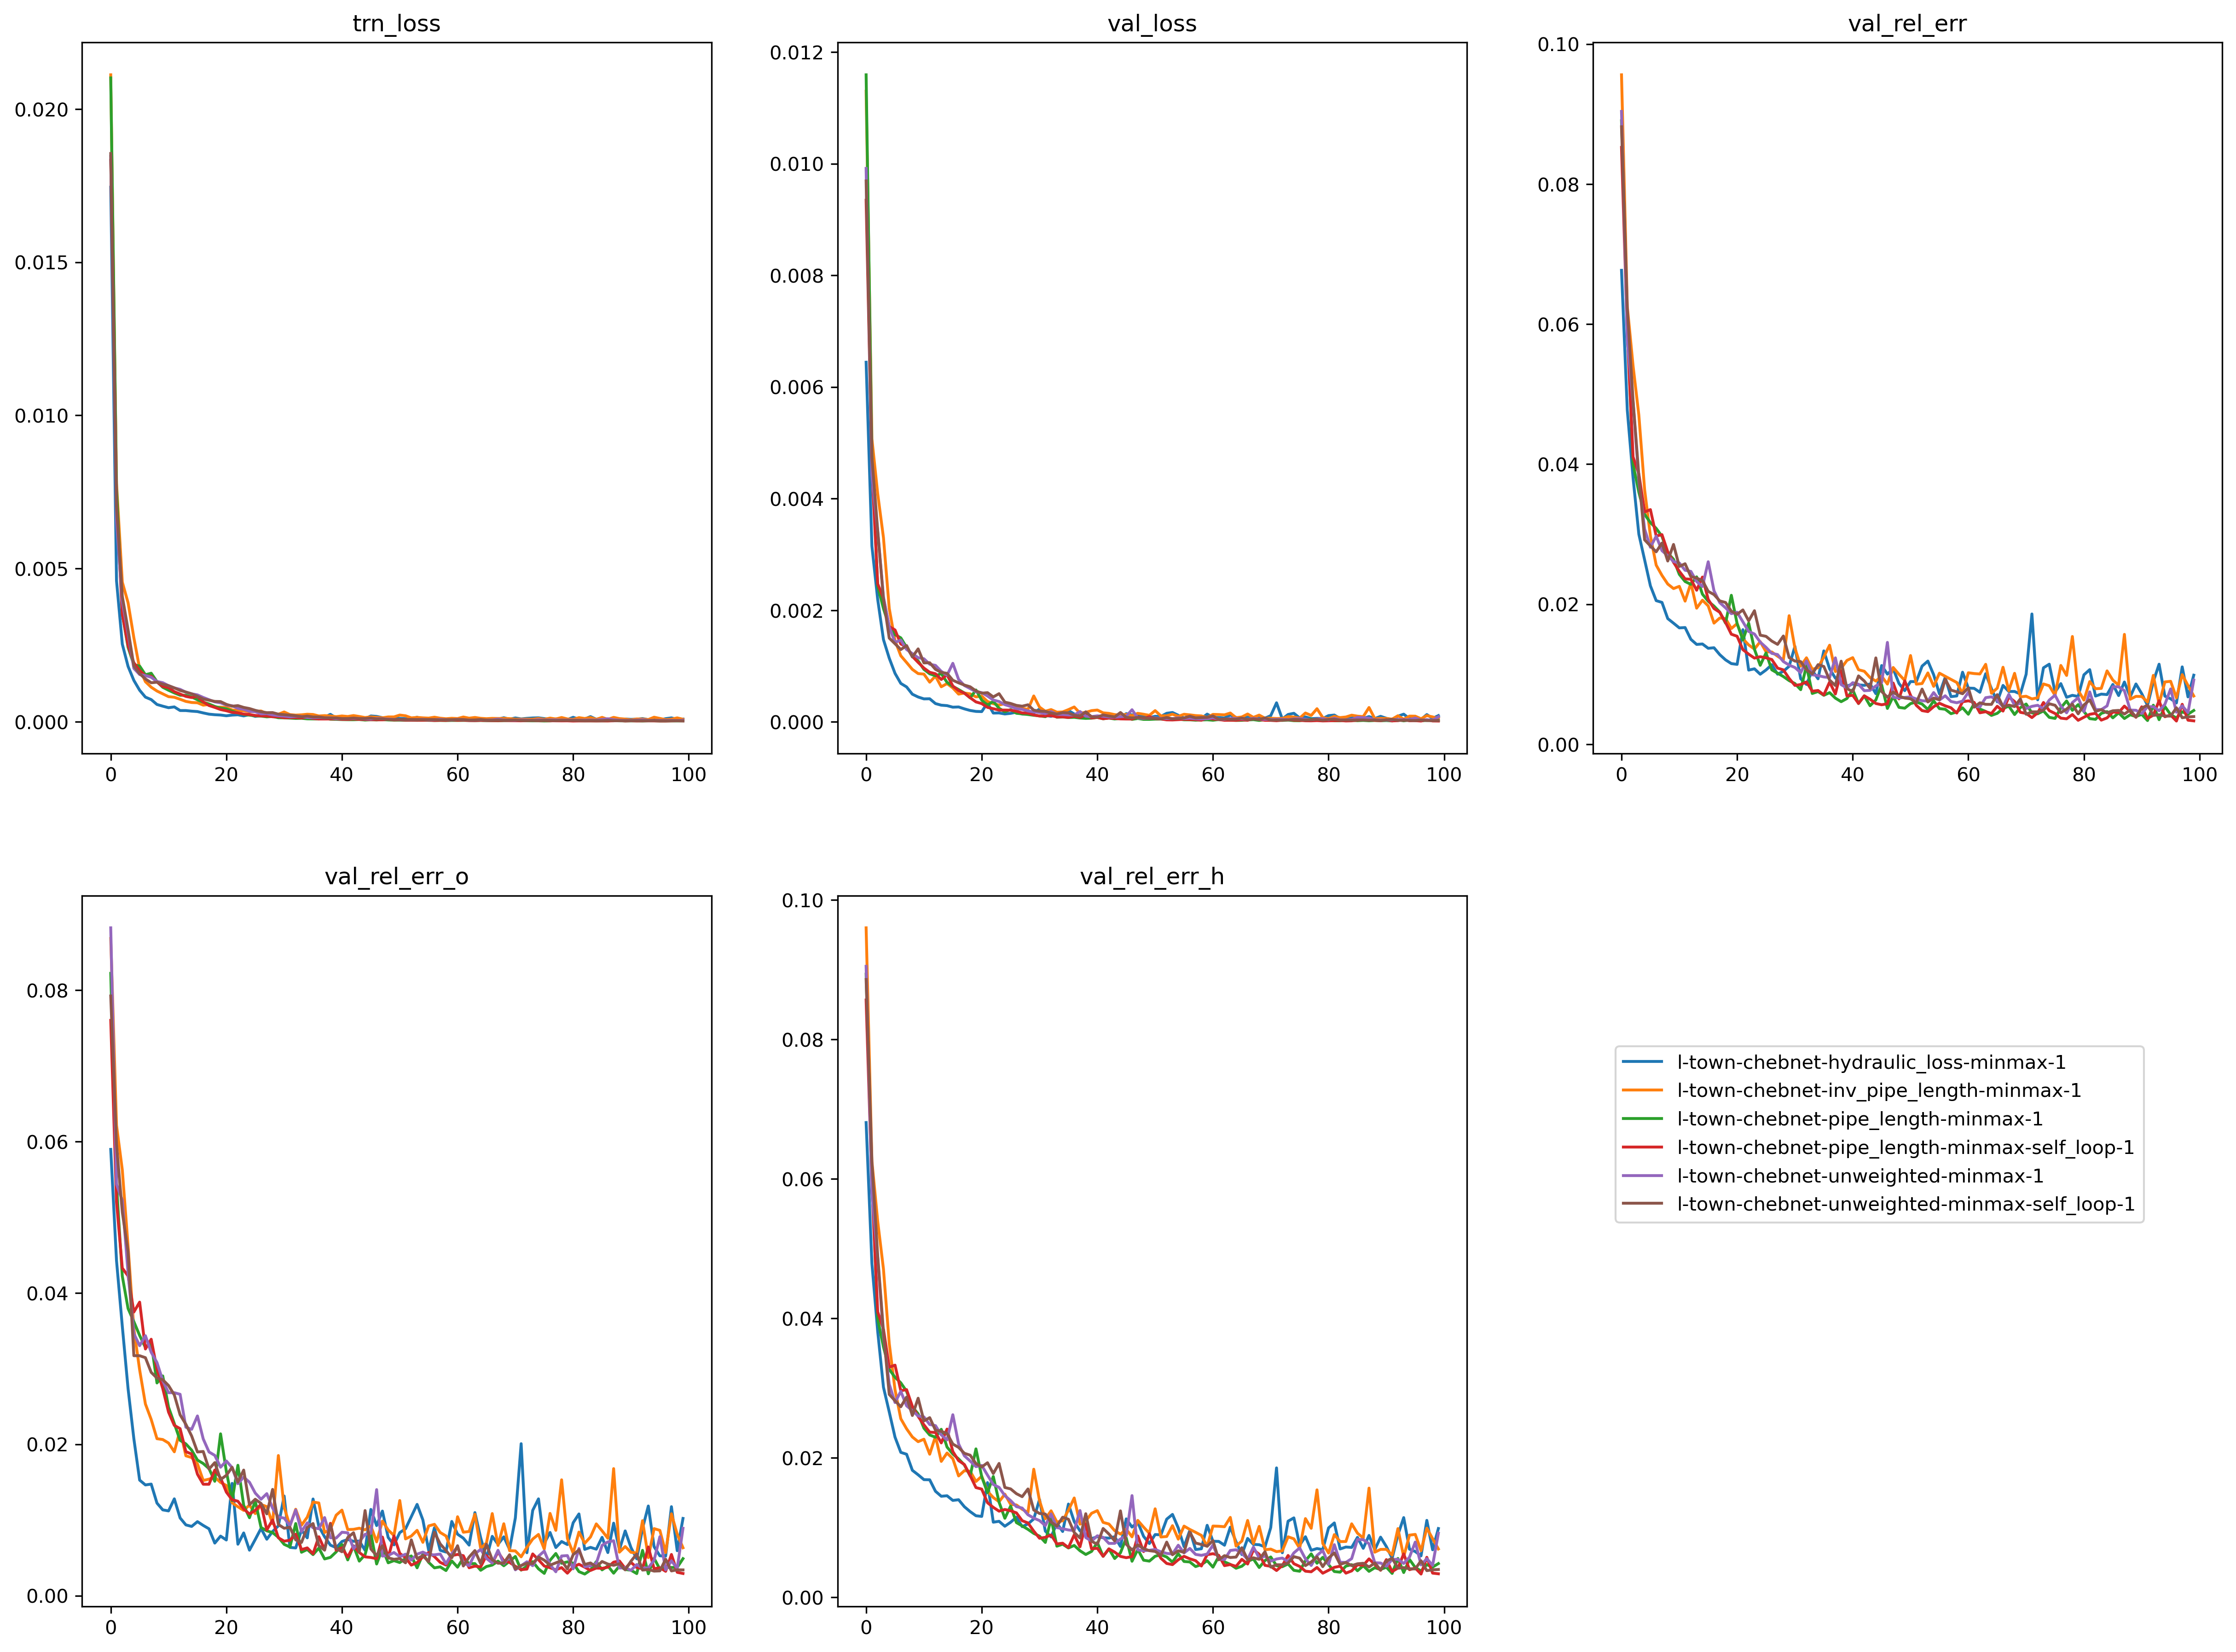

In [6]:
fig,ax = plt.subplots(nrows=2, ncols=3, figsize=(20,15), dpi=300)

for line,axis in zip(df_dict[names[0]].columns, ax.ravel()):
    for key,val in df_dict.items():
        axis.plot(val[line], label = key)
    axis.set_title(line)

handles, labels = axis.get_legend_handles_labels()
by_label        = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.375, -0.1, 0.5, 0.5))
fig.delaxes(ax[1,2])
plt.show()

In [10]:
best_loss={}
for key,df in df_dict.items():
    best_loss[key]=df.min()

In [11]:
best_loss

{'l-town-chebnet-hydraulic_loss-minmax-1': trn_loss         0.000057
 val_loss         0.000042
 val_rel_err      0.005550
 val_rel_err_o    0.004866
 val_rel_err_h    0.005580
 dtype: float64,
 'l-town-chebnet-inv_pipe_length-minmax-1': trn_loss         0.000057
 val_loss         0.000047
 val_rel_err      0.005755
 val_rel_err_o    0.005034
 val_rel_err_h    0.005786
 dtype: float64,
 'l-town-chebnet-pipe_length-minmax-1': trn_loss         0.000022
 val_loss         0.000018
 val_rel_err      0.003387
 val_rel_err_o    0.002857
 val_rel_err_h    0.003408
 dtype: float64,
 'l-town-chebnet-pipe_length-minmax-self_loop-1': trn_loss         0.000021
 val_loss         0.000016
 val_rel_err      0.003316
 val_rel_err_o    0.002932
 val_rel_err_h    0.003320
 dtype: float64,
 'l-town-chebnet-unweighted-minmax-1': trn_loss         0.000035
 val_loss         0.000031
 val_rel_err      0.004384
 val_rel_err_o    0.003158
 val_rel_err_h    0.004430
 dtype: float64,
 'l-town-chebnet-unweighted-m

In [27]:
short_names=['hl-mm','ipl-mm','pl-mm','pl-mm-sl','uw-mm','uw-mm-sl']

/opt/anaconda3/envs/GSP/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


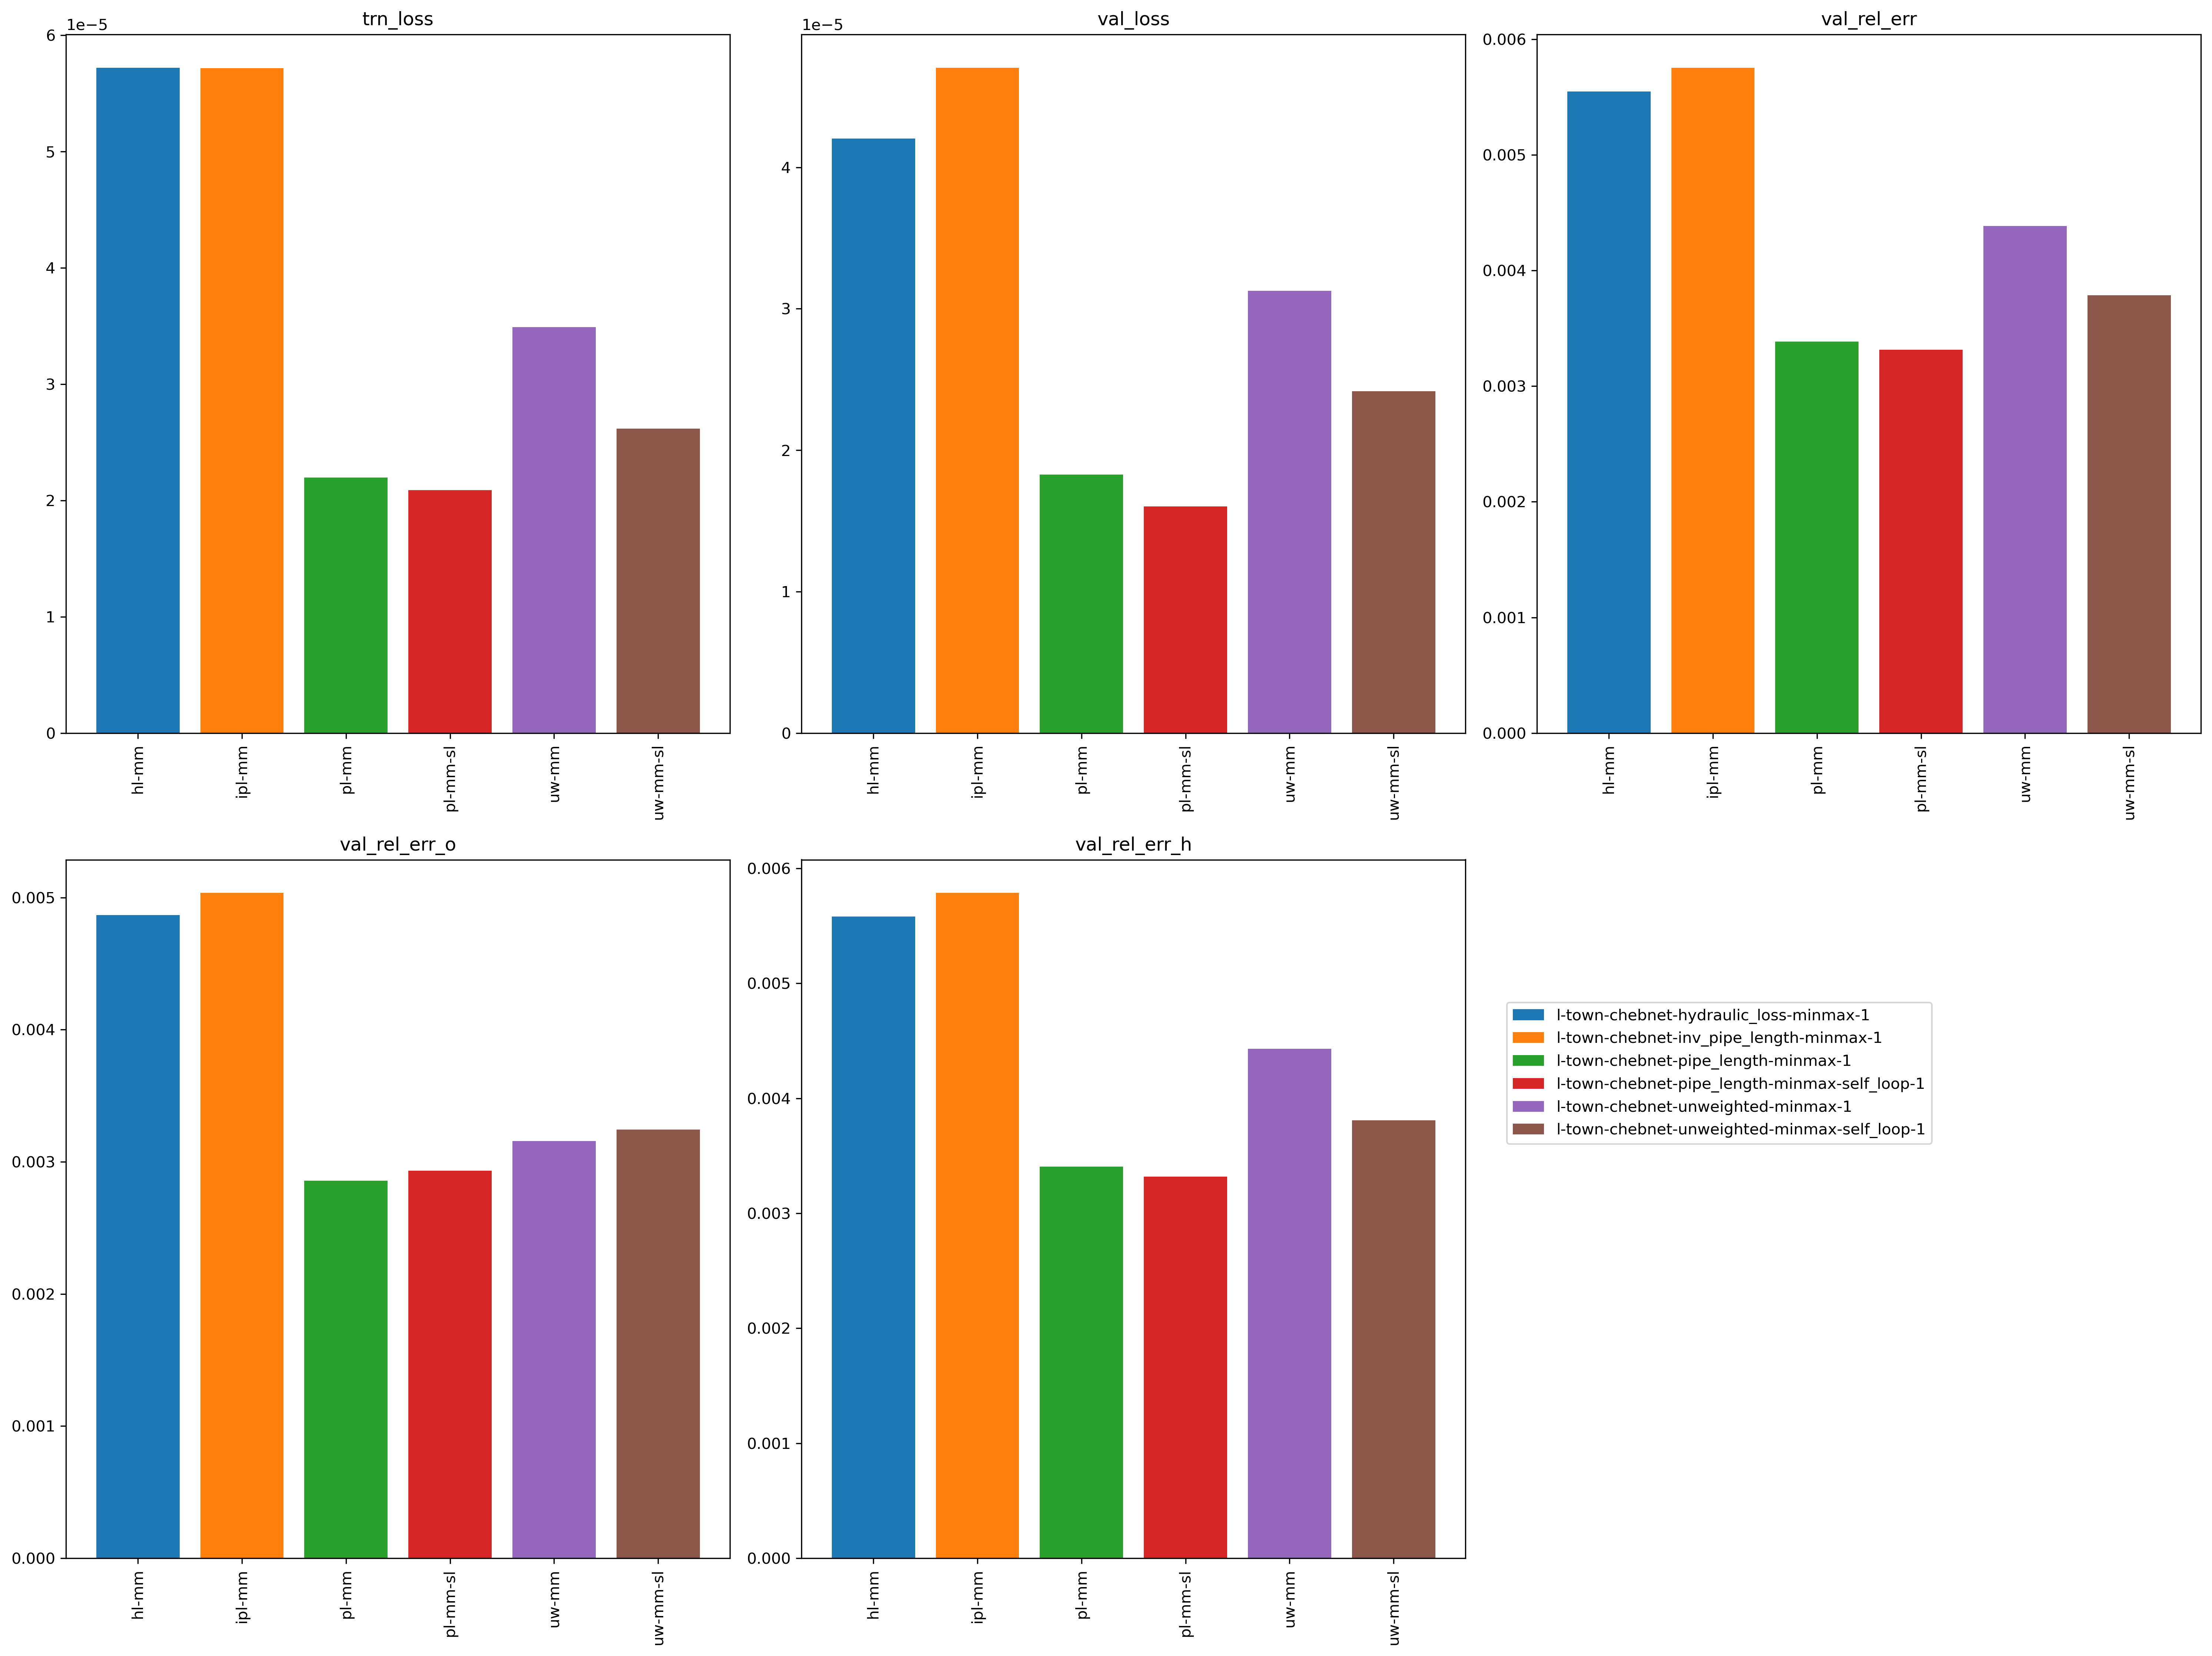

In [29]:
fig,ax = plt.subplots(nrows=2, ncols=3, figsize=(20,15), dpi=300)

for line,axis in zip(df_dict[names[0]].columns, ax.ravel()):
    for key,val in best_loss.items():
        axis.bar(x=key, height=val[line], label = key)
    axis.set_title(line)
    axis.set_xticklabels(short_names,rotation=90)

handles, labels = axis.get_legend_handles_labels()
by_label        = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.375, -0.1, 0.5, 0.5))
fig.delaxes(ax[1,2])
plt.tight_layout()
plt.show()